In [2]:
import pandas as pd
import numpy as np

# Número de empleados y registros
num_employees = 20
num_records = 1000

# Crear un DataFrame con datos ficticios
data = {
    'Empleado_ID': np.random.choice(range(1, num_employees + 1), num_records),
    'Hora_Llegada': np.random.randint(8, 12, num_records) + np.random.rand(num_records)
}

df = pd.DataFrame(data)

# Crear una columna de llegada tarde (por ejemplo, tarde si llega después de las 9:00)
df['Llega_Tarde'] = df['Hora_Llegada'] > 9

# Guardar el DataFrame en un archivo CSV
df.to_csv('/content/empleados_registros.csv', index=False)


              precision    recall  f1-score   support

       False       0.99      1.00      0.99        71
        True       1.00      1.00      1.00       229

    accuracy                           1.00       300
   macro avg       0.99      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



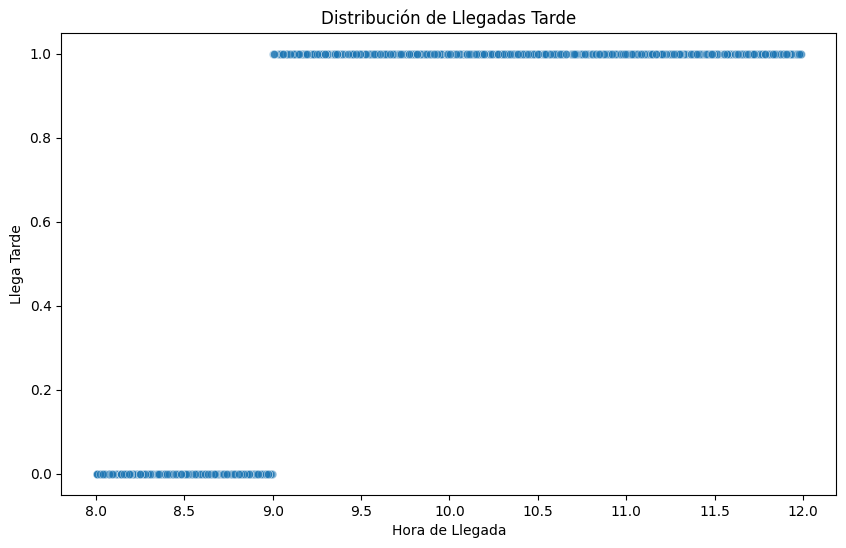

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos
df = pd.read_csv('empleados_registros.csv')

# Variables predictoras y variable objetivo
X = df[['Hora_Llegada']]
y = df['Llega_Tarde']

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear el modelo de regresión logística
model = LogisticRegression()
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
print(classification_report(y_test, y_pred))

# Visualizar los resultados
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Hora_Llegada', y='Llega_Tarde', data=df, alpha=0.5)
plt.xlabel('Hora de Llegada')
plt.ylabel('Llega Tarde')
plt.title('Distribución de Llegadas Tarde')
plt.show()


Informe de clasificación:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00        71
        True       1.00      1.00      1.00       229

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



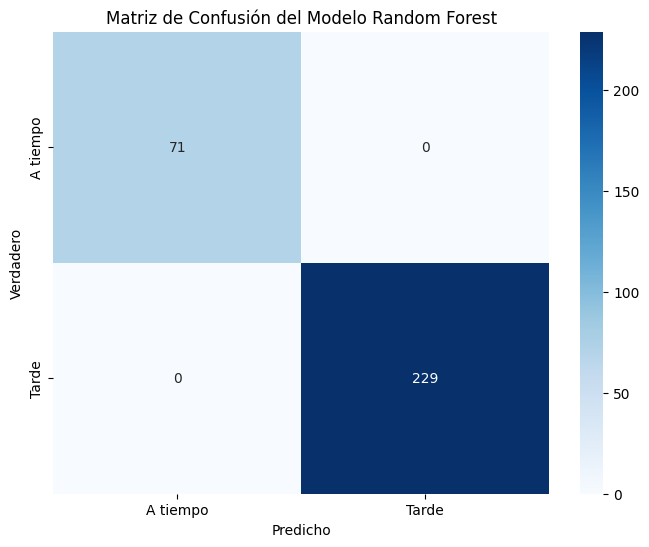

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos
df = pd.read_csv('empleados_registros.csv')

# Variables predictoras y variable objetivo
X = df[['Hora_Llegada']]  # Hora_Llegada como variable predictora
y = df['Llega_Tarde']  # Llega_Tarde como variable objetivo

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear el modelo de Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
print("Informe de clasificación:")
print(classification_report(y_test, y_pred))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['A tiempo', 'Tarde'], yticklabels=['A tiempo', 'Tarde'])
plt.ylabel('Verdadero')
plt.xlabel('Predicho')
plt.title('Matriz de Confusión del Modelo Random Forest')
plt.show()

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Cargar los datos
df = pd.read_csv('empleados_registros.csv')

# Variables predictoras y objetivo
X = df[['Hora_Llegada']]
y = df['Llega_Tarde']

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear y entrenar el modelo Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predicciones
df['Pred_Llega_Tarde'] = model.predict(X)  # Agregar las predicciones al DataFrame original

# Identificar empleados que llegan tarde según las predicciones
empleados_tarde = df[df['Pred_Llega_Tarde'] == 1]
print(empleados_tarde[['Empleado_ID', 'Hora_Llegada']])


     Empleado_ID  Hora_Llegada
0              8     10.359899
5             16     11.457969
8             15     11.325375
13             4     11.730779
14             8     10.472915
..           ...           ...
994            9     10.443764
995           19      9.910940
996            7      9.723245
997           10     11.786450
998           15     10.844276

[750 rows x 2 columns]
